In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock_data = pd.read_csv('../datasets/stock_data.csv', index_col='Date', parse_dates=True).dropna()
benchmark_data = pd.read_csv('../datasets/benchmark_data.csv', index_col='Date', parse_dates=True).dropna()

In [42]:
# Display summary for stock_data
print(stock_data.info())
print(benchmark_data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None


,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


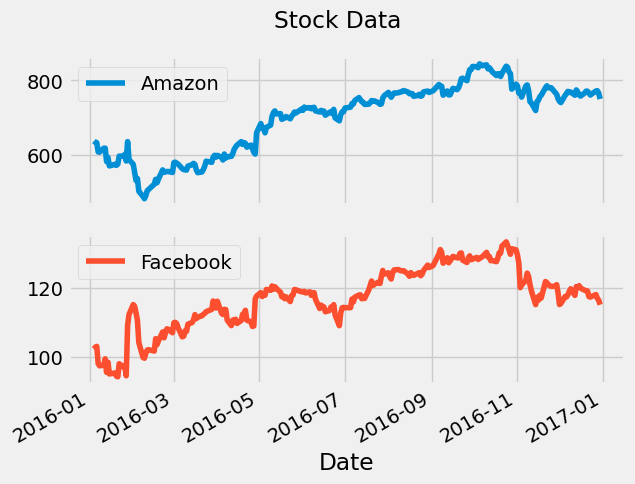

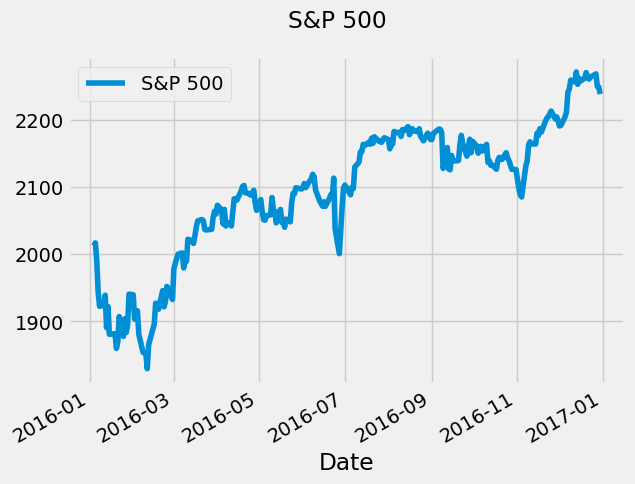

In [43]:
stock_data.plot(subplots=True, title='Stock Data')
stock_data.describe()
benchmark_data.plot(subplots=True, title='S&P 500')
benchmark_data.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


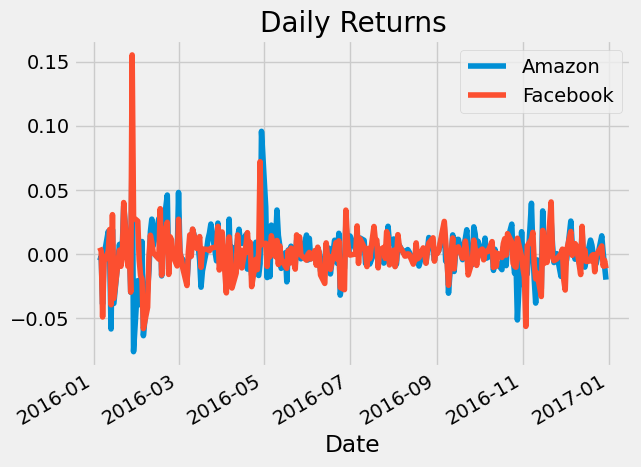

In [44]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.plot()

# summarize the daily returns
# ... YOUR CODE FOR TASK 5 HERE ...
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

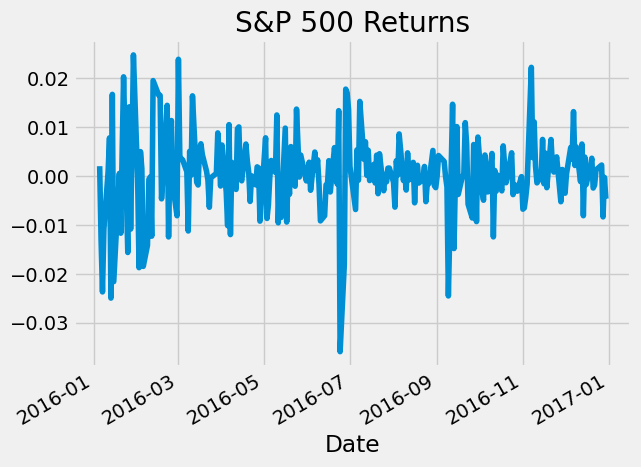

In [45]:
sp_returns = benchmark_data['S&P 500'].pct_change()
sp_returns.plot(title='S&P 500 Returns')
sp_returns.describe()


,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


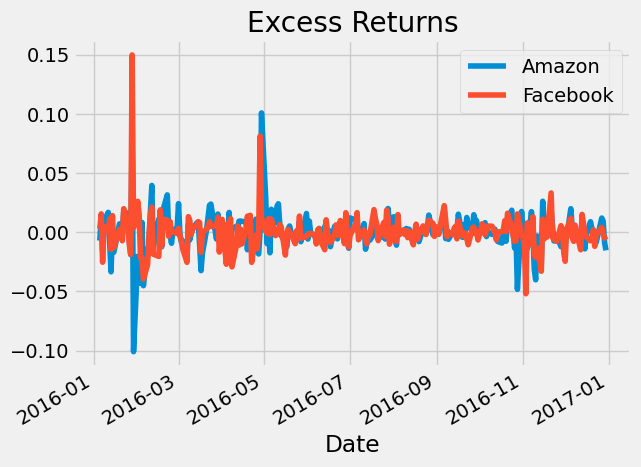

In [46]:
excess_returns = stock_returns.sub(sp_returns, axis=0)
excess_returns.plot(title='Excess Returns')
excess_returns.describe()


<Axes: title={'center': 'Mean of the Return Difference'}>

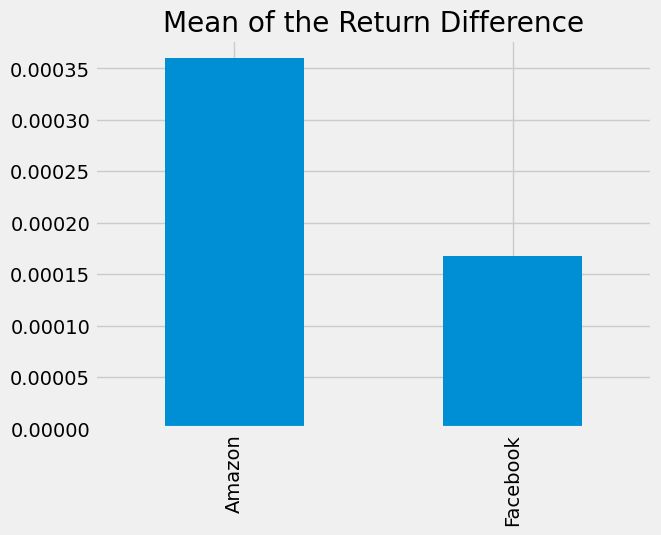

In [47]:
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Mean of the Return Difference')


<Axes: title={'center': 'Standard Deviation of the Return Difference'}>

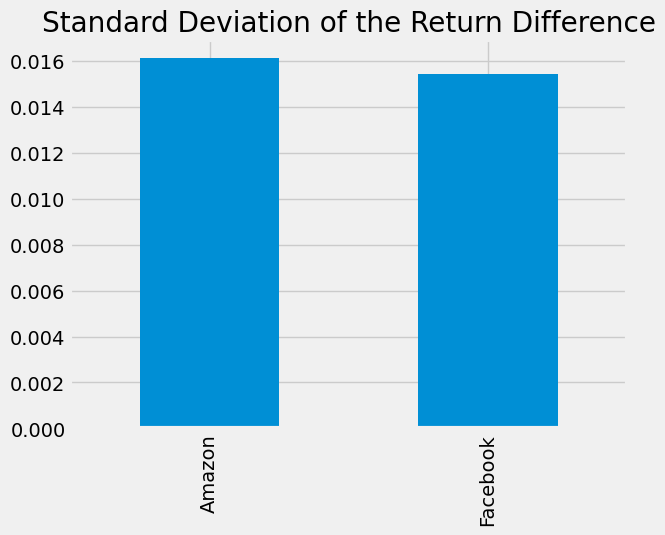

In [48]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
# ... YOUR CODE FOR TASK 9 HERE ...
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

<Axes: title={'center': 'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

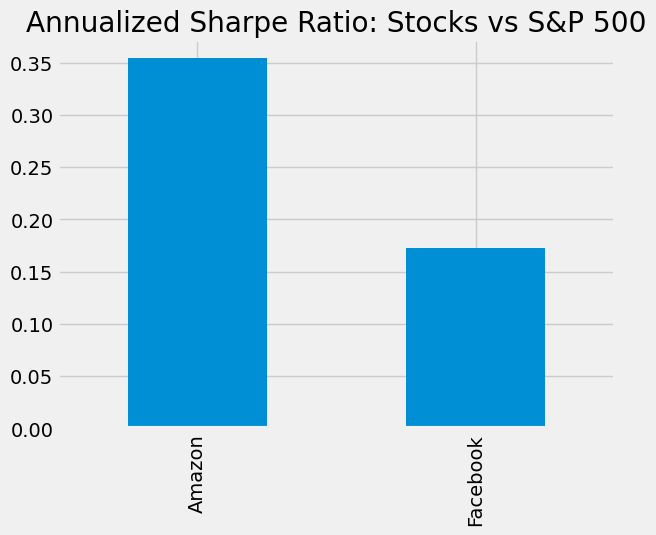

In [49]:
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')
